# Stock Best and Worst Days Analysis

## Overview

This notebook analyzes the recovery patterns of individual stocks following their worst trading days. The analysis examines the top 100 worst and best single-day returns to understand price behavior patterns and recovery characteristics over different time horizons.

## Purpose and Methodology

This code performs a comprehensive analysis of stock price volatility and recovery patterns by:

1. **Data Collection**: Downloads historical stock price data using Yahoo Finance API
2. **Return Calculation**: Computes daily simple returns from closing prices
3. **Extreme Event Identification**: Identifies the top 100 worst and best trading days
4. **Recovery Analysis**: Tracks cumulative returns following worst days across multiple time windows
5. **Pattern Recognition**: Analyzes what happens after the best trading days
6. **Probability Analysis**: Calculates the likelihood of recovery events and timing

## Key Analysis Components

### Recovery Pattern Analysis
- Examines cumulative returns starting from each worst day
- Tracks recovery paths over 5, 10, 30, 60, and 90-day windows
- Calculates success rates, average returns, and risk metrics
- Provides statistical distribution of outcomes

### Post-Rally Analysis
- Studies price behavior following the best trading days
- Compares momentum continuation vs. mean reversion patterns
- Analyzes pullback probabilities after major rallies

### Comparative Studies
- Contrasts recovery patterns vs. post-rally behavior
- Examines the probability of best days following worst days
- Provides timing statistics for recovery events

## Code Structure

The notebook is organized into several key sections:

1. **Data Import and Processing**: Stock data download and return calculations
2. **Extreme Event Detection**: Identification of best/worst trading days
3. **Recovery Analysis Functions**: Statistical analysis of post-crash patterns
4. **Visualization**: Charts showing recovery paths and probability distributions
5. **Probability Calculations**: Analysis of recovery timing and success rates

## Applications

This analysis can be used for:
- Understanding stock-specific volatility patterns
- Developing contrarian trading strategies
- Risk management and position sizing decisions
- Academic research on market behavior
- Educational purposes in quantitative finance

## Limitations

- Historical analysis may not predict future behavior
- Individual stock patterns may differ significantly from market indices
- Transaction costs and liquidity constraints not considered
- Analysis assumes continued trading without delisting events

This analysis is for educational and research purposes only and should not be considered financial advice.

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import yfinance as yf

import warnings
warnings.filterwarnings("ignore")

In [44]:
tickers = ['ORCL']

In [45]:
# Download historical data from yf API
data = yf.download(tickers, period="max", group_by='ticker')

# download data to csv
data.to_csv(f"{tickers[0]}_data_1D.csv")

[*********************100%***********************]  1 of 1 completed


In [46]:
# Load the CSV with MultiIndex columns (Tickers, OHLCV)
df = pd.read_csv(f"{tickers[0]}_data_1D.csv", header=[0,1], index_col=0)

# Drop any rows that are completely NaN (e.g. 'Date' row)
df = df.dropna(how='all')

# Convert all values to float
df = df.astype(float)

# lower case for all the column names
df.columns = df.columns.set_levels([level.str.lower() for level in df.columns.levels])

# drop level 0 of the columns since we have only one ticker
df.columns = df.columns.droplevel(0)

# datetime index
df.index = pd.to_datetime(df.index)

# Show the result
df.head()

Price,open,high,low,close,volume
Date,,,,,
1986-03-12,0.050722,0.051340,0.050722,0.050722,393012000.0
1986-03-13,0.051959,0.052577,0.051959,0.051959,125290800.0
1986-03-14,0.053815,0.054433,0.053815,0.053815,57866400.0
1986-03-17,0.053196,0.053196,0.052577,0.052577,28285200.0
1986-03-18,0.051959,0.051959,0.051340,0.051340,32335200.0


In [47]:
df.shape

(10016, 5)

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10016 entries, 1986-03-12 to 2025-12-10
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   open    10016 non-null  float64
 1   high    10016 non-null  float64
 2   low     10016 non-null  float64
 3   close   10016 non-null  float64
 4   volume  10016 non-null  float64
dtypes: float64(5)
memory usage: 469.5 KB


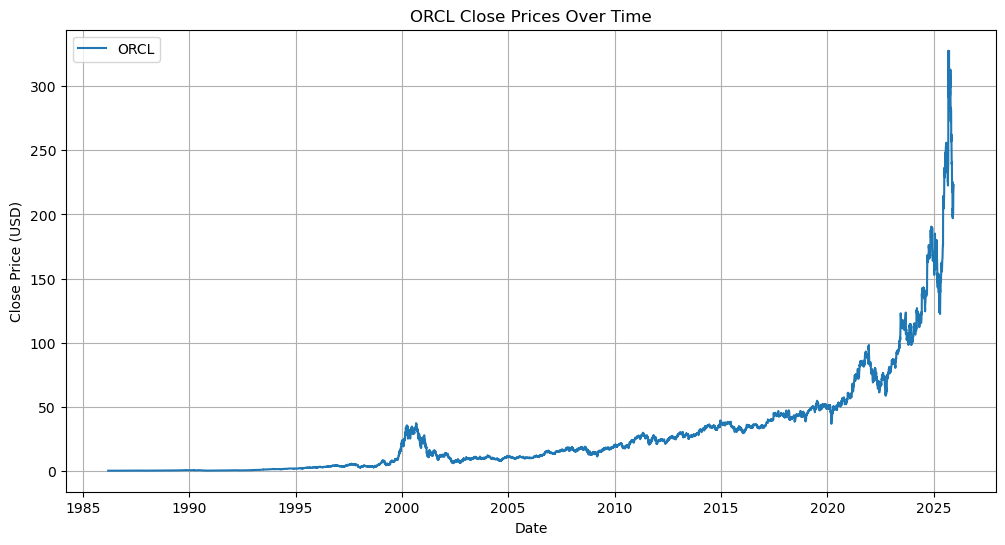

In [49]:
# plot close prices over time
plt.figure(figsize=(12,6))
plt.plot(df.index, df['close'], label=tickers[0])
plt.title(f"{tickers[0]} Close Prices Over Time")
plt.xlabel("Date")
plt.ylabel("Close Price (USD)")
plt.legend()
plt.grid()
plt.show()

In [50]:
# Calculate simple returns with pct_change()
simple_returns = df['close'].pct_change().fillna(0)

# Calculate log returns
log_returns = (1 + simple_returns).apply(np.log)

# Cumulative sum of simple returns (not correct for compounding)
cumsum_simple = simple_returns.cumsum()

In [51]:
simple_returns.tail()

Date
2025-12-04    0.031772
2025-12-05    0.015164
2025-12-08    0.013604
2025-12-09    0.004489
2025-12-10    0.006681
Name: close, dtype: float64

In [52]:
# top 100 worst days
worst_days = simple_returns.nsmallest(100)

# top 100 best days
best_days = simple_returns.nlargest(100)

# print results
print("Top 100 Worst Days:")
print(worst_days)

print("\nTop 100 Best Days:")
print(best_days)

Top 100 Worst Days:
Date
1990-03-28   -0.310344
1997-12-09   -0.291505
1999-03-12   -0.225424
1987-10-26   -0.211766
2001-03-02   -0.210527
                ...   
2000-05-23   -0.076498
1987-10-16   -0.076336
2002-06-03   -0.075758
1988-02-03   -0.075468
1990-08-30   -0.075269
Name: close, Length: 100, dtype: float64

Top 100 Best Days:
Date
1992-12-23    0.438711
2025-09-10    0.359488
1999-06-16    0.310945
1987-10-29    0.250000
2001-01-03    0.213270
                ...   
1992-06-29    0.087718
1999-04-08    0.087464
1991-03-13    0.086954
1990-05-03    0.086615
2002-10-01    0.086514
Name: close, Length: 100, dtype: float64


In [53]:
worst_days.head(10)

Date
1990-03-28   -0.310344
1997-12-09   -0.291505
1999-03-12   -0.225424
1987-10-26   -0.211766
2001-03-02   -0.210527
1990-09-07   -0.177216
1986-07-16   -0.174417
1995-09-15   -0.161560
1990-09-26   -0.152544
2002-03-04   -0.145091
Name: close, dtype: float64

In [54]:
# window size from best and worst days
window_size = [5, 10, 30, 60, 90] # days

# Fixed function that calculates the cumulative sum of simple returns, from one of the worst days, for a given window size
def cumulative_return_from_day(day, window):
    try:
        start_idx = simple_returns.index.get_loc(day)
        end_idx = min(start_idx + window, len(simple_returns))  # Prevent index overflow
        
        # Check if we have enough data points
        if end_idx - start_idx < window:
            # If not enough data, pad with the available data
            available_data = simple_returns.iloc[start_idx:end_idx]
            # Create a series with the requested window size, filling missing values with 0
            padded_data = pd.Series(index=range(window), dtype=float)
            padded_data.iloc[:len(available_data)] = available_data.values
            padded_data = padded_data.fillna(0)
            return padded_data.cumsum()
        else:
            return simple_returns.iloc[start_idx:end_idx].cumsum()
    except (KeyError, IndexError):
        # If date doesn't exist, return a series of zeros
        return pd.Series([0] * window).cumsum()

# call the function for each of the worst days and each window size
cumulative_worst = {window: [] for window in window_size}
successful_days = {window: [] for window in window_size}  # Track which days worked

for day in worst_days.index:
    for window in window_size:
        cum_ret = cumulative_return_from_day(day, window)
        if not cum_ret.isna().all():  # Only add if not all NaN
            cumulative_worst[window].append(cum_ret)
            if window == 5:  # Track successful days for the first window only
                successful_days[window].append(day)

# convert lists to DataFrames with proper indexing
for window in window_size:
    if cumulative_worst[window]:  # Only if we have data
        cumulative_worst[window] = pd.DataFrame(cumulative_worst[window]).T
        # Set proper column names (day indices)
        cumulative_worst[window].columns = range(len(cumulative_worst[window].columns))
    else:
        cumulative_worst[window] = pd.DataFrame()  # Empty DataFrame

print(f"Successfully processed {len(cumulative_worst[5].columns)} worst days for 5-day window")
cumulative_worst[5].head()

Successfully processed 100 worst days for 5-day window


,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
Date,,,,,,,,,,,,,,,,,,,,,
1986-04-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1986-05-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1986-05-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1986-05-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1986-05-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Running final recovery analysis...
Processing 5-day window...
  Successfully processed 100 recovery events
Processing 10-day window...
  Successfully processed 100 recovery events
Processing 30-day window...
  Successfully processed 100 recovery events
Processing 60-day window...
  Successfully processed 100 recovery events
Processing 90-day window...
  Successfully processed 100 recovery events


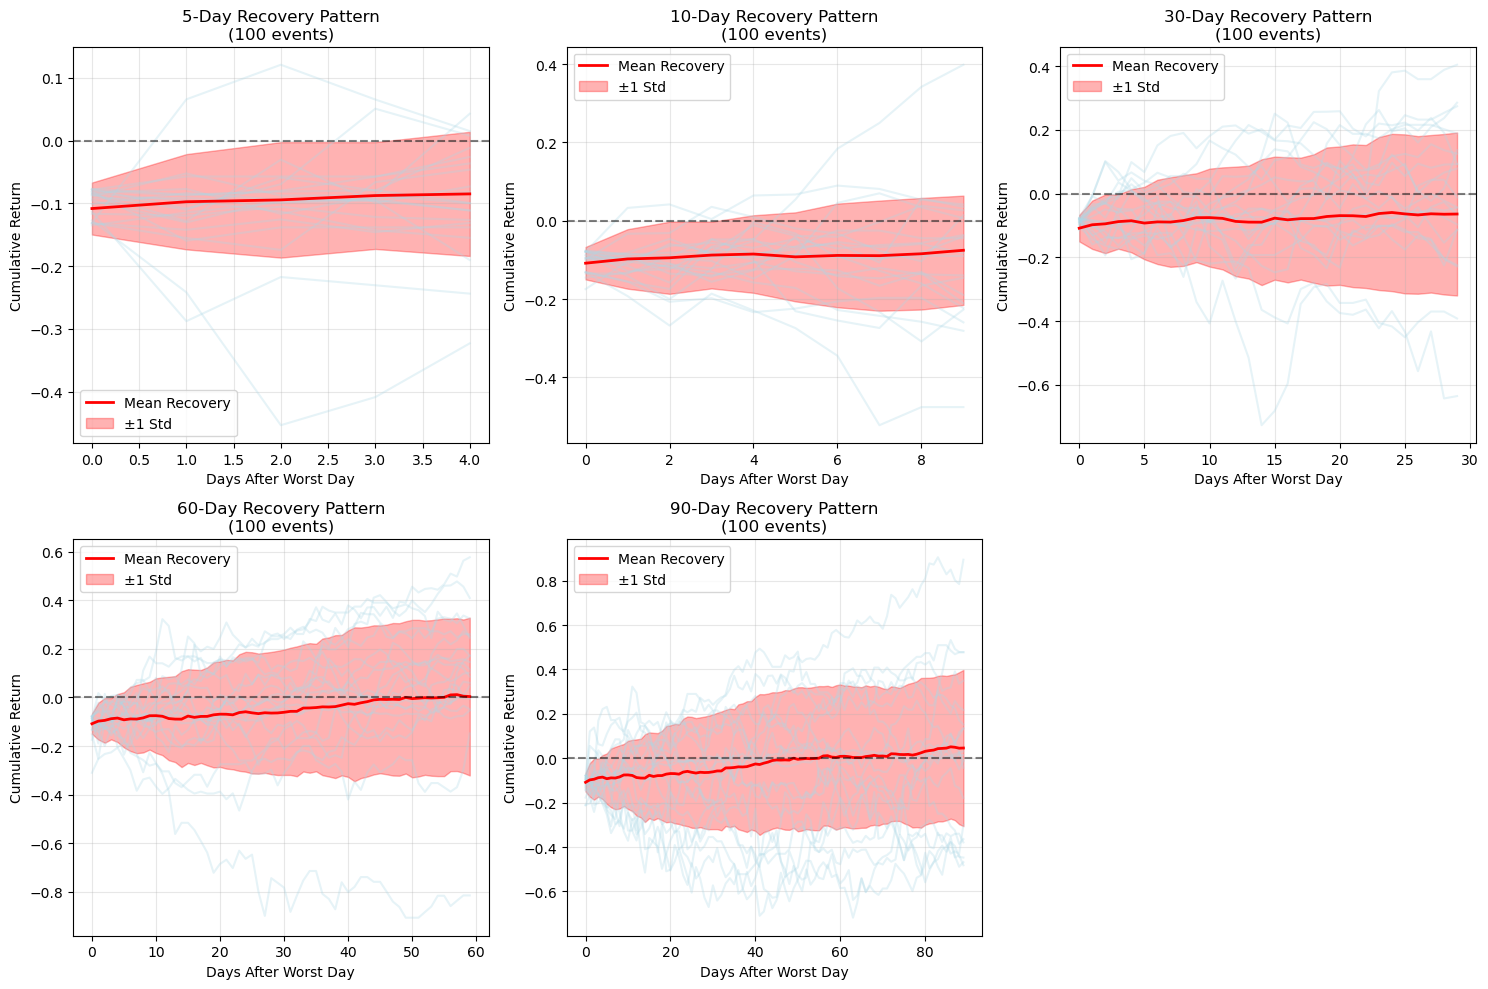


ORCL RECOVERY ANALYSIS AFTER WORST DAYS

5-Day Recovery Window:
  • Average return: -8.49%
  • Probability of positive return: 21%
  • Success rate: 21/100 events
  • Median return: -8.57%
  • Best case: +22.14%
  • Worst case: -32.31%

10-Day Recovery Window:
  • Average return: -7.53%
  • Probability of positive return: 27%
  • Success rate: 27/100 events
  • Median return: -6.84%
  • Best case: +39.83%
  • Worst case: -47.57%

30-Day Recovery Window:
  • Average return: -6.38%
  • Probability of positive return: 40%
  • Success rate: 40/100 events
  • Median return: -4.07%
  • Best case: +49.54%
  • Worst case: -80.10%

60-Day Recovery Window:
  • Average return: +0.37%
  • Probability of positive return: 60%
  • Success rate: 60/100 events
  • Median return: +5.17%
  • Best case: +59.92%
  • Worst case: -126.31%

90-Day Recovery Window:
  • Average return: +4.61%
  • Probability of positive return: 57%
  • Success rate: 57/100 events
  • Median return: +5.36%
  • Best case: +89.40

In [55]:
# CLEAN RECOVERY ANALYSIS - Final Version
def analyze_recovery_patterns_final():
    """Final clean recovery pattern analysis"""
    
    recovery_stats = {}
    
    for window in window_size:
        print(f"Processing {window}-day window...")
        
        all_recovery_paths = []
        valid_dates = []
        
        for day in worst_days.index:
            try:
                # Find the position of this worst day in our returns series
                day_idx = simple_returns.index.get_loc(day)
                
                # Check if we have enough data after this day
                if day_idx + window <= len(simple_returns):
                    # Get the recovery path (including the worst day itself)
                    recovery_path = simple_returns.iloc[day_idx:day_idx + window].cumsum()
                    all_recovery_paths.append(recovery_path.values)
                    valid_dates.append(day)
                    
            except (KeyError, IndexError):
                continue
        
        if all_recovery_paths:
            # Convert to DataFrame: rows = days, columns = recovery events
            recovery_df = pd.DataFrame(all_recovery_paths).T
            recovery_df.index = range(window)  # Days 0, 1, 2, ..., window-1
            
            # Calculate statistics
            mean_recovery = recovery_df.mean(axis=1)
            median_recovery = recovery_df.median(axis=1)
            std_recovery = recovery_df.std(axis=1)
            
            recovery_stats[window] = {
                'data': recovery_df,
                'mean': mean_recovery,
                'median': median_recovery,
                'std': std_recovery,
                'count': len(all_recovery_paths),
                'valid_dates': valid_dates
            }
            
            print(f"  Successfully processed {len(all_recovery_paths)} recovery events")
        else:
            print(f"  No valid recovery events found")
    
    return recovery_stats

# Run the analysis
print("Running final recovery analysis...")
recovery_analysis = analyze_recovery_patterns_final()

# Visualization
plt.figure(figsize=(15, 10))

for i, window in enumerate(window_size):
    if window in recovery_analysis:
        plt.subplot(2, 3, i+1)
        
        # Plot sample recovery paths
        data = recovery_analysis[window]['data']
        sample_data = data.sample(min(20, data.shape[1]), axis=1)
        plt.plot(sample_data, alpha=0.3, color='lightblue')
        
        # Plot mean and confidence bands
        mean_recovery = recovery_analysis[window]['mean']
        std_recovery = recovery_analysis[window]['std']
        
        days = range(len(mean_recovery))
        plt.plot(days, mean_recovery, 'r-', linewidth=2, label='Mean Recovery')
        plt.fill_between(days, 
                        mean_recovery - std_recovery, 
                        mean_recovery + std_recovery, 
                        alpha=0.3, color='red', label='±1 Std')
        
        plt.title(f'{window}-Day Recovery Pattern\n({recovery_analysis[window]["count"]} events)')
        plt.xlabel('Days After Worst Day')
        plt.ylabel('Cumulative Return')
        plt.grid(True, alpha=0.3)
        plt.legend()
        plt.axhline(y=0, color='black', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

# Final Statistics
print("\n" + "="*60)
print(f"{tickers[0]} RECOVERY ANALYSIS AFTER WORST DAYS")
print("="*60)

for window in window_size:
    if window in recovery_analysis:
        stats = recovery_analysis[window]
        
        # Get final day returns for all recovery events
        final_day_returns = stats['data'].iloc[-1]
        mean_return = stats['mean'].iloc[-1]
        
        # Calculate probability statistics
        positive_outcomes = (final_day_returns > 0).sum()
        total_outcomes = len(final_day_returns)
        prob_positive = positive_outcomes / total_outcomes
        
        print(f"\n{window}-Day Recovery Window:")
        print(f"  • Average return: {mean_return:+.2%}")
        print(f"  • Probability of positive return: {prob_positive:.0%}")
        print(f"  • Success rate: {positive_outcomes}/{total_outcomes} events")
        print(f"  • Median return: {final_day_returns.median():+.2%}")
        print(f"  • Best case: {final_day_returns.max():+.2%}")
        print(f"  • Worst case: {final_day_returns.min():+.2%}")

print("\n" + "="*60)
print("="*60)

Running analysis for patterns AFTER best days...
Processing 5-day window after best days...
  Successfully processed 100 periods after best days
Processing 10-day window after best days...
  Successfully processed 100 periods after best days
Processing 30-day window after best days...
  Successfully processed 100 periods after best days
Processing 60-day window after best days...
  Successfully processed 100 periods after best days
Processing 90-day window after best days...
  Successfully processed 99 periods after best days


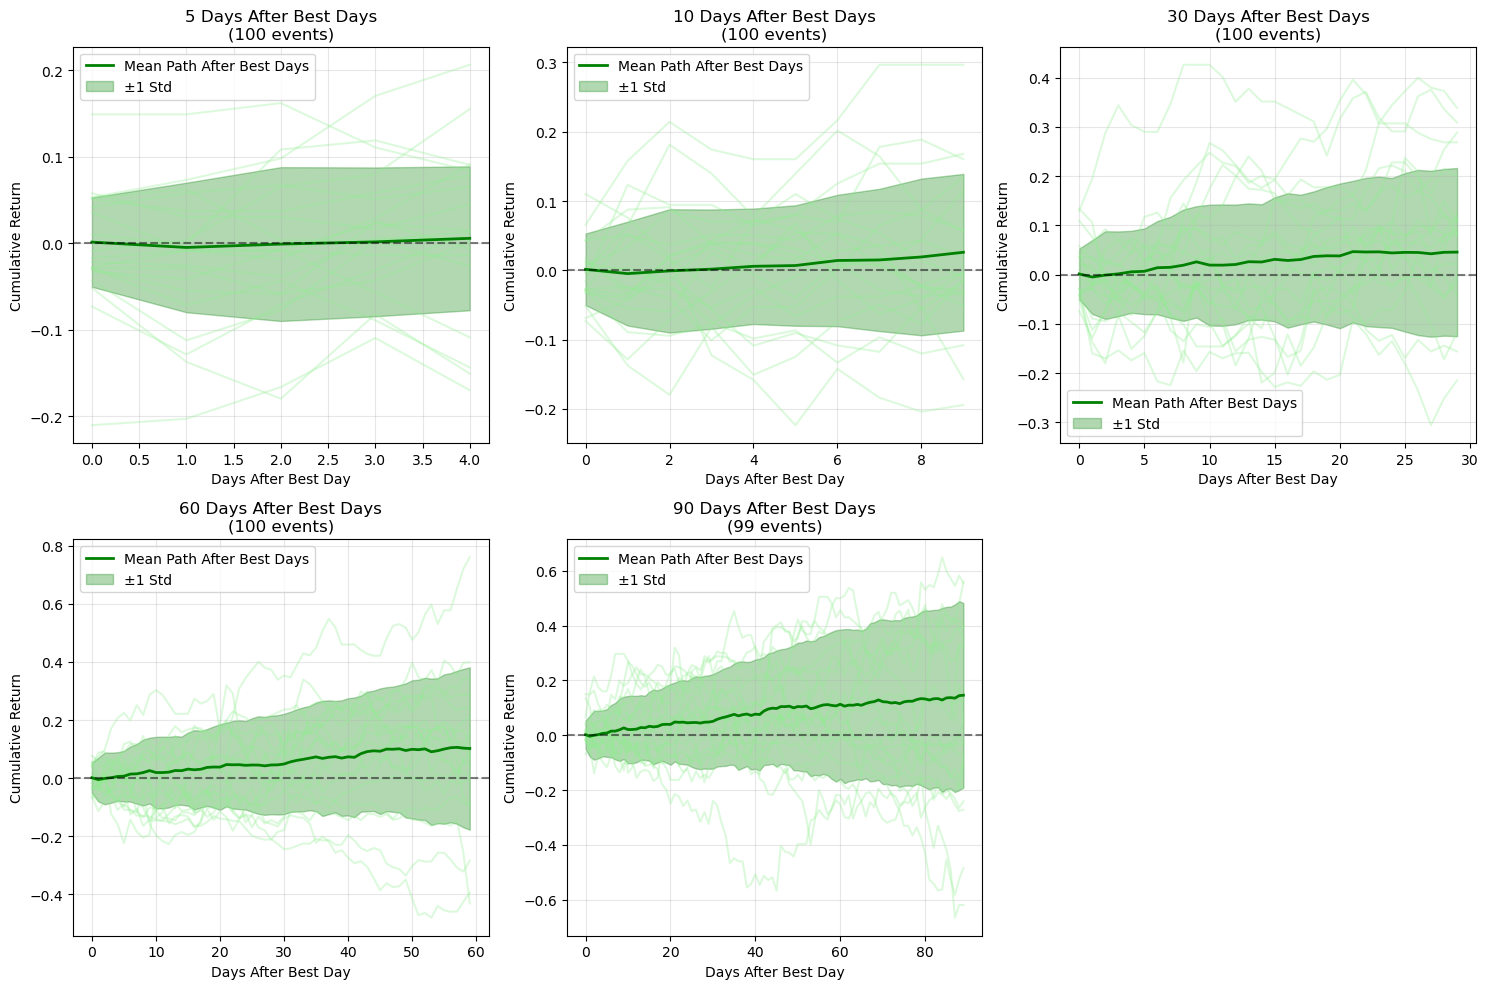


ORCL PATTERNS AFTER THE TOP 100 BEST DAYS

5 Days After Big Rally:
  • Average return: +0.58%
  • Probability of continued gains: 57%
  • Probability of pullback: 43%
  • Continued gains: 57/100 events
  • Pullbacks: 43/100 events
  • Median return: +1.26%
  • Best case: +30.38%
  • Worst case: -32.31%

10 Days After Big Rally:
  • Average return: +2.60%
  • Probability of continued gains: 55%
  • Probability of pullback: 45%
  • Continued gains: 55/100 events
  • Pullbacks: 45/100 events
  • Median return: +1.81%
  • Best case: +42.63%
  • Worst case: -32.89%

30 Days After Big Rally:
  • Average return: +4.58%
  • Probability of continued gains: 66%
  • Probability of pullback: 34%
  • Continued gains: 66/100 events
  • Pullbacks: 34/100 events
  • Median return: +8.15%
  • Best case: +49.25%
  • Worst case: -46.94%

60 Days After Big Rally:
  • Average return: +10.20%
  • Probability of continued gains: 71%
  • Probability of pullback: 29%
  • Continued gains: 71/100 events
  • Pul

In [56]:
# ================================================================
# ANALYSIS OF PATTERNS AFTER THE TOP 100 BEST DAYS
# ================================================================

# CLEAN ANALYSIS FOR BEST DAYS - What happens after major rallies?
def analyze_patterns_after_best_days():
    """Analyze what happens after the top 100 best market days"""
    
    best_day_stats = {}
    
    for window in window_size:
        print(f"Processing {window}-day window after best days...")
        
        all_paths_after_best = []
        valid_dates = []
        
        for day in best_days.index:
            try:
                # Find the position of this best day in our returns series
                day_idx = simple_returns.index.get_loc(day)
                
                # Check if we have enough data after this day
                if day_idx + window <= len(simple_returns):
                    # Get the path AFTER the best day (starting from day+1, not including the best day itself)
                    path_after = simple_returns.iloc[day_idx + 1:day_idx + 1 + window].cumsum()
                    all_paths_after_best.append(path_after.values)
                    valid_dates.append(day)
                    
            except (KeyError, IndexError):
                continue
        
        if all_paths_after_best:
            # Convert to DataFrame: rows = days, columns = events after best days
            paths_df = pd.DataFrame(all_paths_after_best).T
            paths_df.index = range(window)  # Days 1, 2, 3, ..., window after best day
            
            # Calculate statistics
            mean_path = paths_df.mean(axis=1)
            median_path = paths_df.median(axis=1)
            std_path = paths_df.std(axis=1)
            
            best_day_stats[window] = {
                'data': paths_df,
                'mean': mean_path,
                'median': median_path,
                'std': std_path,
                'count': len(all_paths_after_best),
                'valid_dates': valid_dates
            }
            
            print(f"  Successfully processed {len(all_paths_after_best)} periods after best days")
        else:
            print(f"  No valid periods found")
    
    return best_day_stats

# Run the analysis for best days
print("Running analysis for patterns AFTER best days...")
best_day_analysis = analyze_patterns_after_best_days()

# Visualization - What happens AFTER best days
plt.figure(figsize=(15, 10))

for i, window in enumerate(window_size):
    if window in best_day_analysis:
        plt.subplot(2, 3, i+1)
        
        # Plot sample paths after best days
        data = best_day_analysis[window]['data']
        sample_data = data.sample(min(20, data.shape[1]), axis=1)
        plt.plot(sample_data, alpha=0.3, color='lightgreen')
        
        # Plot mean and confidence bands
        mean_path = best_day_analysis[window]['mean']
        std_path = best_day_analysis[window]['std']
        
        days = range(len(mean_path))
        plt.plot(days, mean_path, 'g-', linewidth=2, label='Mean Path After Best Days')
        plt.fill_between(days, 
                        mean_path - std_path, 
                        mean_path + std_path, 
                        alpha=0.3, color='green', label='±1 Std')
        
        plt.title(f'{window} Days After Best Days\n({best_day_analysis[window]["count"]} events)')
        plt.xlabel('Days After Best Day')
        plt.ylabel('Cumulative Return')
        plt.grid(True, alpha=0.3)
        plt.legend()
        plt.axhline(y=0, color='black', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

# Statistics for what happens AFTER best days
print("\n" + "="*60)
print(f"{tickers[0]} PATTERNS AFTER THE TOP 100 BEST DAYS")
print("="*60)

for window in window_size:
    if window in best_day_analysis:
        stats = best_day_analysis[window]
        
        # Get final day returns for all periods after best days
        final_day_returns = stats['data'].iloc[-1]
        mean_return = stats['mean'].iloc[-1]
        
        # Calculate probability statistics
        positive_outcomes = (final_day_returns > 0).sum()
        total_outcomes = len(final_day_returns)
        prob_positive = positive_outcomes / total_outcomes
        
        # Calculate negative outcomes (pullbacks after rallies)
        negative_outcomes = (final_day_returns < 0).sum()
        prob_negative = negative_outcomes / total_outcomes
        
        print(f"\n{window} Days After Big Rally:")
        print(f"  • Average return: {mean_return:+.2%}")
        print(f"  • Probability of continued gains: {prob_positive:.0%}")
        print(f"  • Probability of pullback: {prob_negative:.0%}")
        print(f"  • Continued gains: {positive_outcomes}/{total_outcomes} events")
        print(f"  • Pullbacks: {negative_outcomes}/{total_outcomes} events")
        print(f"  • Median return: {final_day_returns.median():+.2%}")
        print(f"  • Best case: {final_day_returns.max():+.2%}")
        print(f"  • Worst case: {final_day_returns.min():+.2%}")

print("\n" + "="*60)
print("="*60)

# COMPARATIVE ANALYSIS: Best Days vs Worst Days
print("\n" + "="*80)
print("COMPARATIVE ANALYSIS: AFTER BEST DAYS vs AFTER WORST DAYS")
print("="*80)

# Create comparison table
comparison_data = []
for window in window_size:
    if window in recovery_analysis and window in best_day_analysis:
        # After worst days (recovery analysis)
        worst_mean = recovery_analysis[window]['mean'].iloc[-1]
        worst_prob_positive = (recovery_analysis[window]['data'].iloc[-1] > 0).mean()
        
        # After best days
        best_mean = best_day_analysis[window]['mean'].iloc[-1]
        best_prob_positive = (best_day_analysis[window]['data'].iloc[-1] > 0).mean()
        
        comparison_data.append({
            'Window': f'{window} days',
            'After_Worst_Mean': f'{worst_mean:+.2%}',
            'After_Worst_Success': f'{worst_prob_positive:.0%}',
            'After_Best_Mean': f'{best_mean:+.2%}',
            'After_Best_Success': f'{best_prob_positive:.0%}',
            'Difference': f'{best_mean - worst_mean:+.2%}'
        })

comparison_df = pd.DataFrame(comparison_data)
print(comparison_df.to_string(index=False))

print("\n" + "="*80)
print("STRATEGIC IMPLICATIONS:")
print("• Market timing: Compare recovery odds vs post-rally risks")
print("• Contrarian vs momentum: Which approach works better at different horizons?")
print("• Portfolio rebalancing: When to buy dips vs take profits")
print("="*80)

In [57]:
# FIXED VERSION - Create DataFrame with proper structure
# Create DataFrames instead of adding columns to Series
worst_days_df = pd.DataFrame({
    'return': worst_days.values,
    'day_type': 'worst'
}, index=worst_days.index)

best_days_df = pd.DataFrame({
    'return': best_days.values,
    'day_type': 'best'
}, index=best_days.index)

# concatenate the two dataframes
worst_and_best = pd.concat([worst_days_df, best_days_df])

# sort by index (date)
worst_and_best = worst_and_best.sort_index()

# print shape and head
print("Combined DataFrame shape:", worst_and_best.shape)
print("\nFirst few rows:")
print(worst_and_best.head())

print("\nLast few rows:")
print(worst_and_best.tail())

print("\nValue counts by day type:")
print(worst_and_best['day_type'].value_counts())

print("\nSample of worst days:")
print(worst_and_best[worst_and_best['day_type'] == 'worst'].head())

print("\nSample of best days:")
print(worst_and_best[worst_and_best['day_type'] == 'best'].head())

Combined DataFrame shape: (200, 2)

First few rows:
              return day_type
Date                         
1986-04-17  0.090912     best
1986-04-21  0.096153     best
1986-04-30 -0.082575    worst
1986-07-15 -0.113406    worst
1986-07-16 -0.174417    worst

Last few rows:
              return day_type
Date                         
2024-09-10  0.114376     best
2025-01-27 -0.137909    worst
2025-04-09  0.122008     best
2025-06-12  0.133122     best
2025-09-10  0.359488     best

Value counts by day type:
day_type
best     100
worst    100
Name: count, dtype: int64

Sample of worst days:
              return day_type
Date                         
1986-04-30 -0.082575    worst
1986-07-15 -0.113406    worst
1986-07-16 -0.174417    worst
1986-09-11 -0.114749    worst
1986-09-26 -0.095246    worst

Sample of best days:
              return day_type
Date                         
1986-04-17  0.090912     best
1986-04-21  0.096153     best
1986-10-08  0.150014     best
1987-01-09  0.11955

In [58]:
# lambda function to calculate the difference in days between two consecutive dates
worst_and_best['days_since_last'] = worst_and_best.index.to_series().diff().dt.days.fillna(0).astype(int)

# print the first few rows to verify
print("\nFirst few rows with days_since_last:")
print(worst_and_best.head())


First few rows with days_since_last:
              return day_type  days_since_last
Date                                          
1986-04-17  0.090912     best                0
1986-04-21  0.096153     best                4
1986-04-30 -0.082575    worst                9
1986-07-15 -0.113406    worst               76
1986-07-16 -0.174417    worst                1


In [59]:
worst_and_best.head(10)

,return,day_type,days_since_last
Date,,,
1986-04-17,0.090912,best,0
1986-04-21,0.096153,best,4
1986-04-30,-0.082575,worst,9
1986-07-15,-0.113406,worst,76
1986-07-16,-0.174417,worst,1
1986-09-11,-0.114749,worst,57
1986-09-26,-0.095246,worst,15
1986-10-08,0.150014,best,12
1987-01-09,0.119556,best,93


PROBABILITY ANALYSIS: WORST DAYS FOLLOWED BY BEST DAYS

Analyzing 5-day window...
  • Probability: 21.0%
  • Success cases: 21/100
  • Average days to recovery: 2.7

Analyzing 10-day window...
  • Probability: 32.0%
  • Success cases: 32/100
  • Average days to recovery: 4.3

Analyzing 30-day window...
  • Probability: 62.0%
  • Success cases: 62/100
  • Average days to recovery: 11.9

Analyzing 60-day window...
  • Probability: 73.0%
  • Success cases: 73/100
  • Average days to recovery: 16.0

Analyzing 90-day window...
  • Probability: 78.0%
  • Success cases: 78/100
  • Average days to recovery: 19.9

SUMMARY: PROBABILITY OF BEST DAY AFTER WORST DAY
 Window (Days) Probability Success Rate Avg Days to Recovery Median Days Range
             5       21.0%       21/100                  2.7         2.0   1-5
            10       32.0%       32/100                  4.3         4.5  1-10
            30       62.0%       62/100                 11.9        10.0  1-29
            60       7

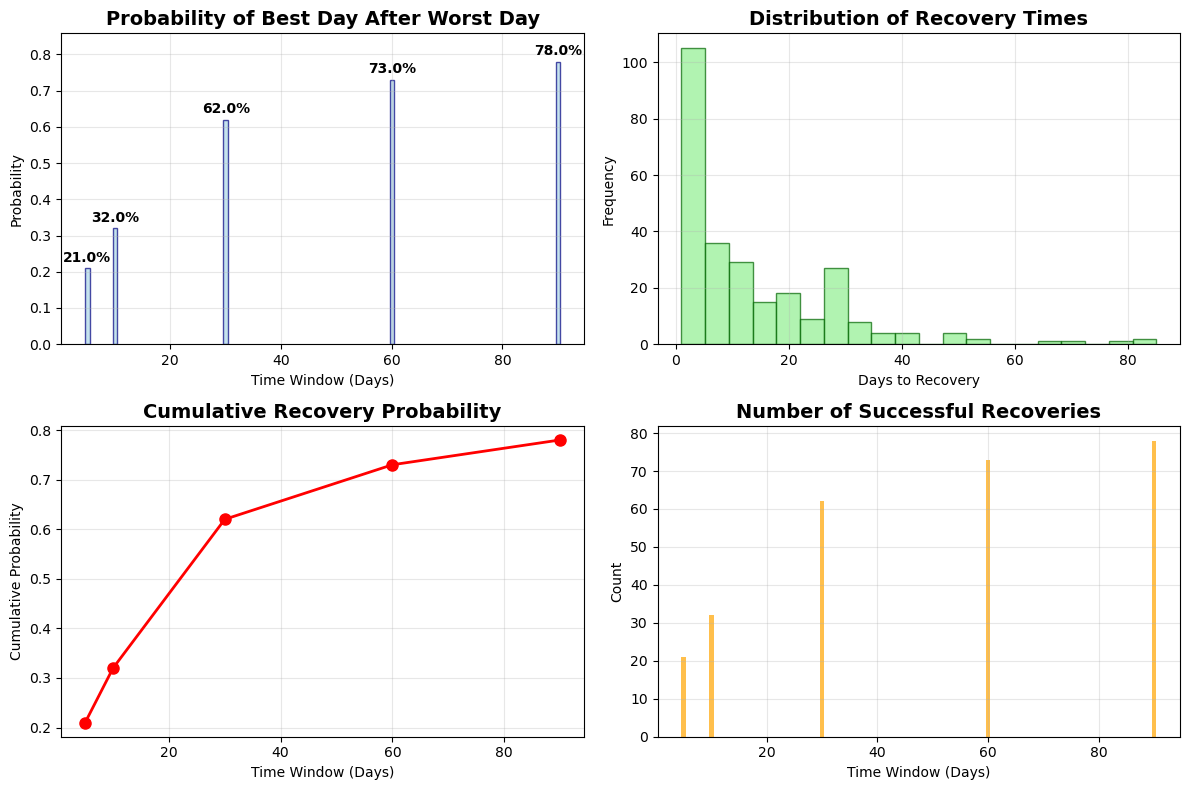


SAMPLE SUCCESSFUL RECOVERY CASES (30-day window)
 1. Worst day: 1986-09-11 (-11.47%)
    Best day:  1986-10-08 (+15.00%)
    Recovery:  27 days

 2. Worst day: 1986-09-26 (-9.52%)
    Best day:  1986-10-08 (+15.00%)
    Recovery:  12 days

 3. Worst day: 1987-05-18 (-8.11%)
    Best day:  1987-06-16 (+10.00%)
    Recovery:  29 days

 4. Worst day: 1987-05-19 (-7.84%)
    Best day:  1987-06-16 (+10.00%)
    Recovery:  28 days

 5. Worst day: 1987-06-11 (-7.69%)
    Best day:  1987-06-16 (+10.00%)
    Recovery:  5 days

 6. Worst day: 1987-10-06 (-8.72%)
    Best day:  1987-10-21 (+13.40%)
    Recovery:  15 days

 7. Worst day: 1987-10-16 (-7.63%)
    Best day:  1987-10-21 (+13.40%)
    Recovery:  5 days

 8. Worst day: 1987-10-19 (-14.05%)
    Best day:  1987-10-21 (+13.40%)
    Recovery:  2 days

 9. Worst day: 1987-10-22 (-12.73%)
    Best day:  1987-10-29 (+25.00%)
    Recovery:  7 days

10. Worst day: 1987-10-23 (-11.46%)
    Best day:  1987-10-29 (+25.00%)
    Recovery:  6 days



In [60]:
# ================================================================
# PROBABILITY ANALYSIS: WORST DAYS FOLLOWED BY BEST DAYS
# ================================================================

def analyze_worst_to_best_probability(worst_and_best_df, window_sizes):
    """
    Calculate the probability that after a worst day, we get a best day within different time windows
    """
    
    results = {}
    
    # Get only worst days
    worst_days_only = worst_and_best_df[worst_and_best_df['day_type'] == 'worst'].copy()
    
    print("="*70)
    print("PROBABILITY ANALYSIS: WORST DAYS FOLLOWED BY BEST DAYS")
    print("="*70)
    
    for window in window_sizes:
        print(f"\nAnalyzing {window}-day window...")
        
        success_count = 0
        total_worst_days = 0
        successful_dates = []
        
        for worst_date in worst_days_only.index:
            total_worst_days += 1
            
            # Define the window after this worst day
            window_start = worst_date + pd.Timedelta(days=1)  # Start from next day
            window_end = worst_date + pd.Timedelta(days=window)
            
            # Check if there's a best day within this window
            best_days_in_window = worst_and_best_df[
                (worst_and_best_df.index > worst_date) & 
                (worst_and_best_df.index <= window_end) & 
                (worst_and_best_df['day_type'] == 'best')
            ]
            
            if len(best_days_in_window) > 0:
                success_count += 1
                # Get the first best day in the window
                first_best_day = best_days_in_window.index[0]
                days_to_recovery = (first_best_day - worst_date).days
                successful_dates.append({
                    'worst_date': worst_date,
                    'best_date': first_best_day,
                    'days_to_recovery': days_to_recovery,
                    'worst_return': worst_and_best_df.loc[worst_date, 'return'],
                    'best_return': worst_and_best_df.loc[first_best_day, 'return']
                })
        
        # Calculate probability
        probability = success_count / total_worst_days if total_worst_days > 0 else 0
        
        results[window] = {
            'probability': probability,
            'success_count': success_count,
            'total_worst_days': total_worst_days,
            'successful_cases': successful_dates
        }
        
        print(f"  • Probability: {probability:.1%}")
        print(f"  • Success cases: {success_count}/{total_worst_days}")
        
        # Show average days to recovery
        if successful_dates:
            avg_days = np.mean([case['days_to_recovery'] for case in successful_dates])
            print(f"  • Average days to recovery: {avg_days:.1f}")
    
    return results

# Run the analysis
window_sizes = [5, 10, 30, 60, 90]
recovery_probabilities = analyze_worst_to_best_probability(worst_and_best, window_sizes)

# ================================================================
# DETAILED RESULTS AND VISUALIZATION
# ================================================================

# Create summary table
summary_data = []
for window in window_sizes:
    stats = recovery_probabilities[window]
    
    # Calculate additional statistics
    if stats['successful_cases']:
        avg_days = np.mean([case['days_to_recovery'] for case in stats['successful_cases']])
        median_days = np.median([case['days_to_recovery'] for case in stats['successful_cases']])
        min_days = min([case['days_to_recovery'] for case in stats['successful_cases']])
        max_days = max([case['days_to_recovery'] for case in stats['successful_cases']])
    else:
        avg_days = median_days = min_days = max_days = np.nan
    
    summary_data.append({
        'Window (Days)': window,
        'Probability': f"{stats['probability']:.1%}",
        'Success Rate': f"{stats['success_count']}/{stats['total_worst_days']}",
        'Avg Days to Recovery': f"{avg_days:.1f}" if not np.isnan(avg_days) else "N/A",
        'Median Days': f"{median_days:.1f}" if not np.isnan(median_days) else "N/A",
        'Range': f"{min_days}-{max_days}" if not np.isnan(min_days) else "N/A"
    })

summary_df = pd.DataFrame(summary_data)
print("\n" + "="*80)
print("SUMMARY: PROBABILITY OF BEST DAY AFTER WORST DAY")
print("="*80)
print(summary_df.to_string(index=False))

# ================================================================
# VISUALIZATION: PROBABILITY BY WINDOW SIZE
# ================================================================

plt.figure(figsize=(12, 8))

# Extract probabilities for plotting
windows = list(recovery_probabilities.keys())
probabilities = [recovery_probabilities[w]['probability'] for w in windows]

# Create bar plot
plt.subplot(2, 2, 1)
bars = plt.bar(windows, probabilities, color='lightblue', edgecolor='navy', alpha=0.7)
plt.title('Probability of Best Day After Worst Day', fontsize=14, fontweight='bold')
plt.xlabel('Time Window (Days)')
plt.ylabel('Probability')
plt.ylim(0, max(probabilities) * 1.1)

# Add percentage labels on bars
for bar, prob in zip(bars, probabilities):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, 
             f'{prob:.1%}', ha='center', va='bottom', fontweight='bold')

plt.grid(True, alpha=0.3)

# Recovery time distribution
plt.subplot(2, 2, 2)
all_recovery_times = []
for window in windows:
    if recovery_probabilities[window]['successful_cases']:
        recovery_times = [case['days_to_recovery'] for case in recovery_probabilities[window]['successful_cases']]
        all_recovery_times.extend(recovery_times)

if all_recovery_times:
    plt.hist(all_recovery_times, bins=20, color='lightgreen', alpha=0.7, edgecolor='darkgreen')
    plt.title('Distribution of Recovery Times', fontsize=14, fontweight='bold')
    plt.xlabel('Days to Recovery')
    plt.ylabel('Frequency')
    plt.grid(True, alpha=0.3)

# Cumulative probability
plt.subplot(2, 2, 3)
plt.plot(windows, probabilities, marker='o', linewidth=2, markersize=8, color='red')
plt.title('Cumulative Recovery Probability', fontsize=14, fontweight='bold')
plt.xlabel('Time Window (Days)')
plt.ylabel('Cumulative Probability')
plt.grid(True, alpha=0.3)

# Success count comparison
plt.subplot(2, 2, 4)
success_counts = [recovery_probabilities[w]['success_count'] for w in windows]
plt.bar(windows, success_counts, color='orange', alpha=0.7)
plt.title('Number of Successful Recoveries', fontsize=14, fontweight='bold')
plt.xlabel('Time Window (Days)')
plt.ylabel('Count')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# ================================================================
# SAMPLE SUCCESSFUL CASES
# ================================================================

print("\n" + "="*80)
print("SAMPLE SUCCESSFUL RECOVERY CASES (30-day window)")
print("="*80)

if recovery_probabilities[30]['successful_cases']:
    sample_cases = recovery_probabilities[30]['successful_cases'][:10]  # First 10 cases
    
    for i, case in enumerate(sample_cases, 1):
        print(f"{i:2d}. Worst day: {case['worst_date'].strftime('%Y-%m-%d')} ({case['worst_return']:+.2%})")
        print(f"    Best day:  {case['best_date'].strftime('%Y-%m-%d')} ({case['best_return']:+.2%})")
        print(f"    Recovery:  {case['days_to_recovery']} days")
        print()

print("="*80)
print("="*80)

In [61]:
# ================================================================
# DAY AFTER ANALYSIS
# ================================================================

# Function to add worst and best columns (boolean) to the DataFrame if df.index date is in worst_days or best_days
def add_worst_best_flags(df, worst_days, best_days):
    df = df.copy()
    df['is_worst_day'] = df.index.isin(worst_days.index)
    df['is_best_day'] = df.index.isin(best_days.index)
    return df

# Add simple returns column to the main DataFrame
df['simple_return'] = df['close'].pct_change().fillna(0)

# Add flags to the main DataFrame
df_with_flags = add_worst_best_flags(df, worst_days, best_days)
df_with_flags.head(10)

Price,open,high,low,close,volume,simple_return,is_worst_day,is_best_day
Date,,,,,,,,
1986-03-12,0.050722,0.051340,0.050722,0.050722,393012000.0,0.000000,False,False
1986-03-13,0.051959,0.052577,0.051959,0.051959,125290800.0,0.024387,False,False
1986-03-14,0.053815,0.054433,0.053815,0.053815,57866400.0,0.035717,False,False
1986-03-17,0.053196,0.053196,0.052577,0.052577,28285200.0,-0.023000,False,False
1986-03-18,0.051959,0.051959,0.051340,0.051340,32335200.0,-0.023526,False,False
1986-03-19,0.051340,0.051340,0.050103,0.050103,22712400.0,-0.024093,False,False
1986-03-20,0.050103,0.050722,0.050103,0.050103,17787600.0,0.000000,False,False
1986-03-21,0.049484,0.049484,0.048247,0.048247,16232400.0,-0.037040,False,False
1986-03-24,0.048247,0.048866,0.048247,0.048247,20736000.0,0.000000,False,False


In [62]:
# Add signal column: 1 for NEXT day after worst day, -1 for NEXT day after best day, 0 otherwise
def add_signal_column(df):
    df = df.copy()
    df['signal'] = 0  # Default to 0
    
    for i in range(1, len(df)):
        if df['is_worst_day'].iloc[i-1]:
            df.at[df.index[i], 'signal'] = 1
        elif df['is_best_day'].iloc[i-1]:
            df.at[df.index[i], 'signal'] = -1
            
    return df

df_with_signals = add_signal_column(df_with_flags)
df_with_signals.head(10)

Price,open,high,low,close,volume,simple_return,is_worst_day,is_best_day,signal
Date,,,,,,,,,
1986-03-12,0.050722,0.051340,0.050722,0.050722,393012000.0,0.000000,False,False,0
1986-03-13,0.051959,0.052577,0.051959,0.051959,125290800.0,0.024387,False,False,0
1986-03-14,0.053815,0.054433,0.053815,0.053815,57866400.0,0.035717,False,False,0
1986-03-17,0.053196,0.053196,0.052577,0.052577,28285200.0,-0.023000,False,False,0
1986-03-18,0.051959,0.051959,0.051340,0.051340,32335200.0,-0.023526,False,False,0
1986-03-19,0.051340,0.051340,0.050103,0.050103,22712400.0,-0.024093,False,False,0
1986-03-20,0.050103,0.050722,0.050103,0.050103,17787600.0,0.000000,False,False,0
1986-03-21,0.049484,0.049484,0.048247,0.048247,16232400.0,-0.037040,False,False,0
1986-03-24,0.048247,0.048866,0.048247,0.048247,20736000.0,0.000000,False,False,0


In [63]:
# Calculate average return on days "after", grouped by signal
average_returns_after_worst = df_with_signals[df_with_signals['signal'] == 1]['simple_return'].mean()
average_returns_after_best = df_with_signals[df_with_signals['signal'] == -1]['simple_return'].mean()

print(f"Average return on days after worst days: {average_returns_after_worst:+.2%}")
print(f"Average return on days after best days: {average_returns_after_best:+.2%}")

Average return on days after worst days: +1.08%
Average return on days after best days: +0.14%


In [64]:
# Calculate percentages of positive returns on days after worst and best days (win ratio)
win_ratio_after_worst = (df_with_signals[df_with_signals['signal'] == 1]['simple_return'] > 0).mean()
win_ratio_after_best = (df_with_signals[df_with_signals['signal'] == -1]['simple_return'] > 0).mean()

print(f"Win ratio on days after worst days: {win_ratio_after_worst:.1%}")
print(f"Win ratio on days after best days: {win_ratio_after_best:.1%}")

Win ratio on days after worst days: 54.0%
Win ratio on days after best days: 48.0%


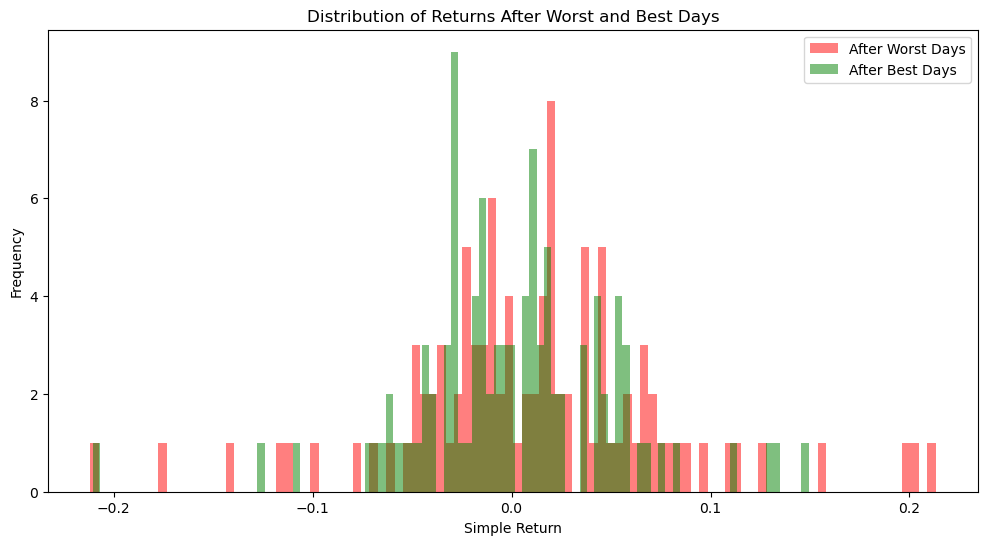

In [66]:
# Plot distribution of returns after worst and best days
plt.figure(figsize=(12,6))
plt.hist(df_with_signals[df_with_signals['signal'] == 1]['simple_return'], bins=100, alpha=0.5, label='After Worst Days', color='red')
plt.hist(df_with_signals[df_with_signals['signal'] == -1]['simple_return'], bins=100, alpha=0.5, label='After Best Days', color='green')
plt.title('Distribution of Returns After Worst and Best Days')
plt.xlabel('Simple Return')
plt.ylabel('Frequency')
plt.legend()
plt.show()